<a href="https://colab.research.google.com/github/Joselyne50/DEEPLEARNING/blob/main/mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#packages

In [39]:
import os
from bs4 import BeautifulSoup as bs
import requests
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
import re
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
from nltk import pos_tag
from random import randint
nltk.download('stopwords')
nltk.download('punkt')

initialize portstemmer class

In [ ]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

english stopwords

In [ ]:
stpwords = set(stopwords.words('english'))
stpwords

mount to google drive to access some of the os related stuffs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

make pandas display all columns and rows

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#list of URL to be visited and make webscrap to get text content from them

In [ ]:
# Define the domains
domains = {
    'coding': {
        'filenames': [f'coding{i}' for i in range(10)],
        'links': ['https://www.w3schools.com/python/python_file_open.asp',
                  'https://www.geeksforgeeks.org/how-to-read-from-a-file-in-python/',
                  'https://www.freecodecamp.org/news/how-to-read-files-in-python/',
                  'https://stackoverflow.com/questions/64442598/web-scraping-how-to-get-the-class',
                  'https://stackoverflow.com/questions/172720/speeding-up-python',
                  'https://stackoverflow.com/questions/59836809/data-visualization-in-python',
                  'https://stackoverflow.com/questions/13441788/artificial-intelligence-that-evolves-in-python',
                  'https://stackoverflow.com/questions/19231691/python-is-there-an-orm-for-sql-and-nosql',
                  'https://stackoverflow.com/questions/62976648/architecture-flask-vs-fastapi',
                  'https://stackoverflow.com/questions/23477921/bfs-algorithm-in-python']
    },
    'Artificial_Intelligence': {
        'filenames': [f'Artificial_Intelligence{i}' for i in range(11)],
        'links': ['https://www.w3schools.com/python/python_ml_getting_started.asp',
                  'https://www.iqsdirectory.com/articles/Artificial_Intelligence/mechanical-components.htmlhttps://www.ibm.com/topics/computer-vision#:~:text=Computer%20vision%20is%20a%20field,recommendations%20based%20on%20that%20information.',
                  'https://appinventiv.com/blog/ai-in-gaming/amp/',
                  'https://www.simplilearn.com/ai-in-automative-article',
                  'https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/ai-vs-machine-learning-vs-deep-learning',
                  'https://www.deeplearning.ai/resources/natural-language-processing/',
                  'https://huggingface.co/blog/rlhf',
                  'https://www.zdnet.com/article/what-is-the-internet-of-things-everything-you-need-to-know-about-the-iot-right-now/',
                  'https://www.avanse.com/blog/robotics-industrial-automation-good-career-path#:~:text=Robotics%20%26%20industrial%20automation%20refers%20to,%2C%20speed%2C%20and%20overall%20performance.',
                  'https://www.tech.gov.sg/media/technews/tech-and-education-how-automation-and-ai-is-powering-learning-in-singapore',
                  'https://www.ibm.com/blog/the-benefits-of-ai-in-healthcare/']
    },
    'health': {
        'filenames': [f'health{i}' for i in range(11)],
        'links': ['https://jamanetwork.com/journals/jama/article-abstract/2811016',
                  'https://www.healthxchange.sg/food-nutrition/food-tips/drinking-water-right-time',
                  'https://in-part.com/blog/17-top-healthcare-innovations-2023-identified-by-the-global-rd-community/?gclid=CjwKCAjwv-2pBhB-EiwAtsQZFKs-Iq-12u7_eKOdPnhXAPJ46YIoeUQ6rLVt3xBhr2X8e5Anq9wdlhoCu98QAvD_BwE#no17',
                  'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6130913/',
                  'https://www.medicalnewstoday.com/articles/antibiotics-and-eczema-is-there-a-link',
                  'https://my.clevelandclinic.org/health/diseases/7104-diabetes',
                  'https://www.samhsa.gov/mental-health',
                  'https://www.a-star.edu.sg/gis/our-science/disease-research-at-gis/cardiovascular-disease-research',
                  'https://www.cancer.gov/news-events/cancer-currents-blog',
                  'https://www.activesgcircle.gov.sg/activehealth/read/nutrition/what-is-good-nutrition-and-why-is-it-important',
                  'https://apac.mykidneyjourney.com/en-SG/dialysis?utm_source=SEM&utm_medium=CPC&utm_campaign=SG_SEM_2023&utm_content=AboutDialysis_RSA&gclid=Cj0KCQjw4vKpBhCZARIsAOKHoWQ29x_VjJYxVX-TTmUVphswT1i38BMewld33PNYv3j6F-2-nnJdPA8aAiYuEALw_wcB']
    }
}


#Text data processing

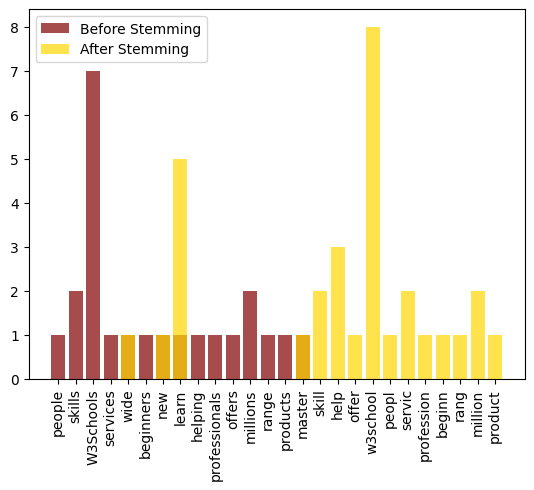

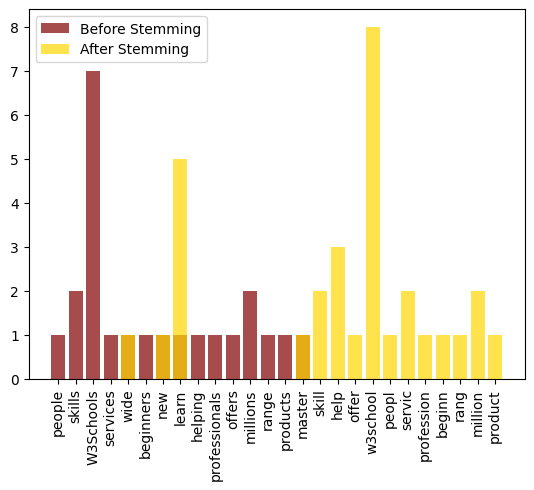

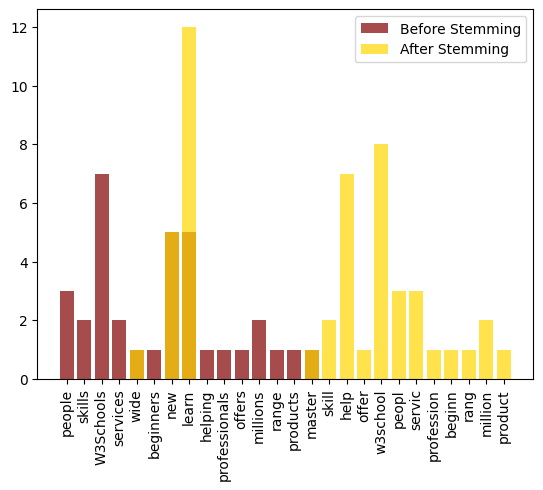

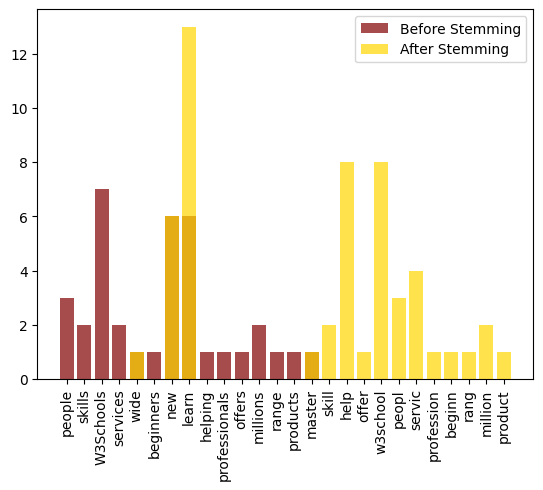

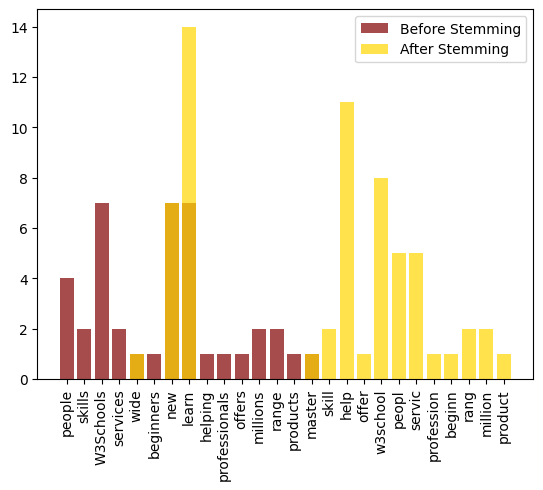

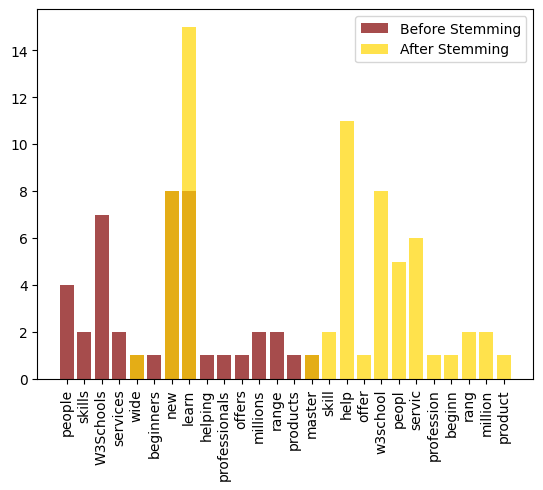

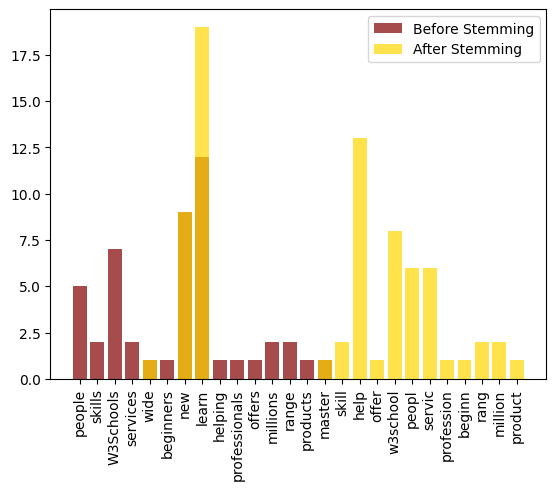

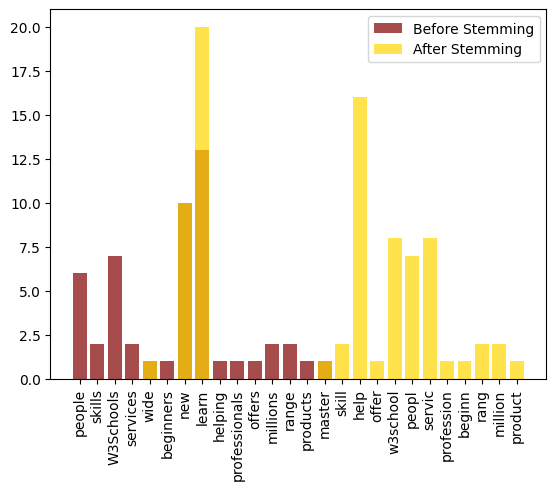

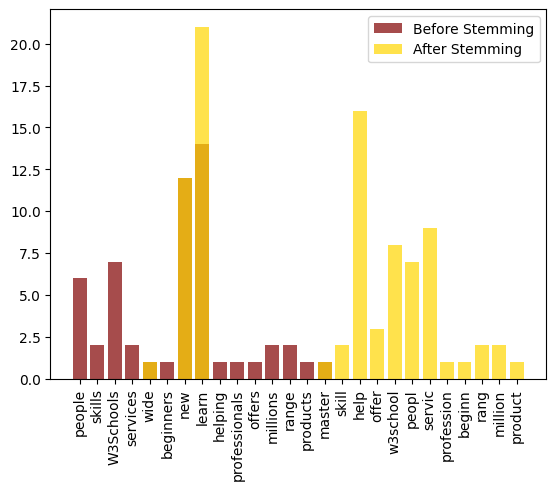

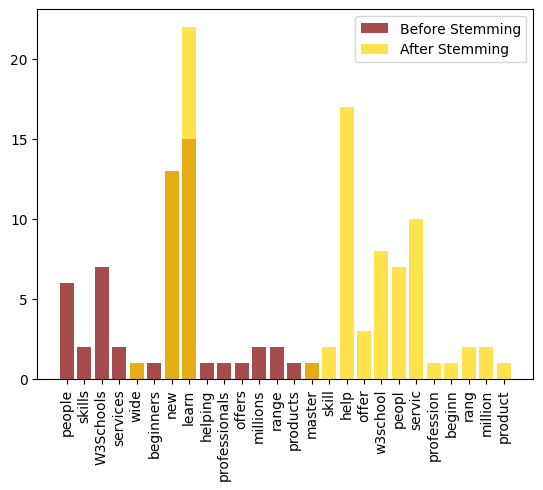

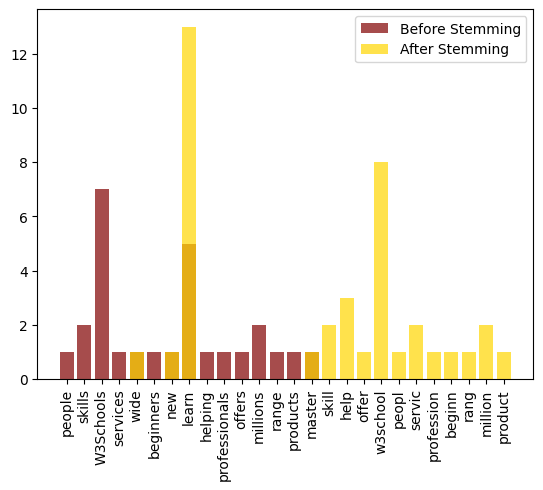

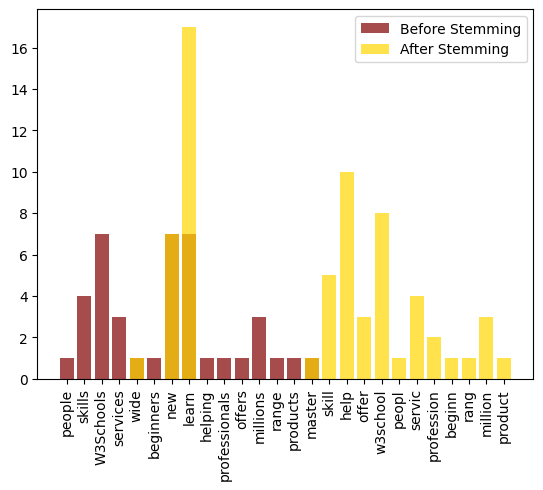

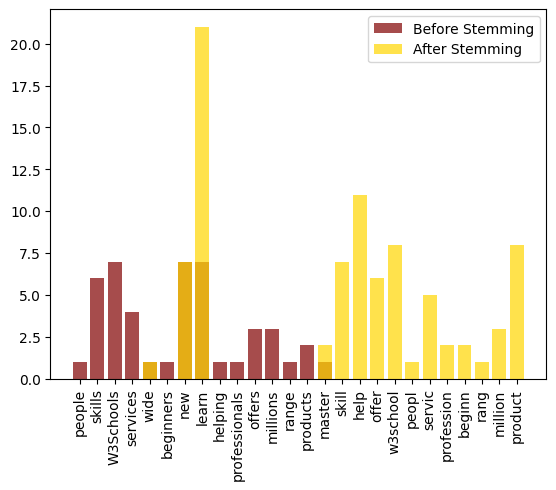

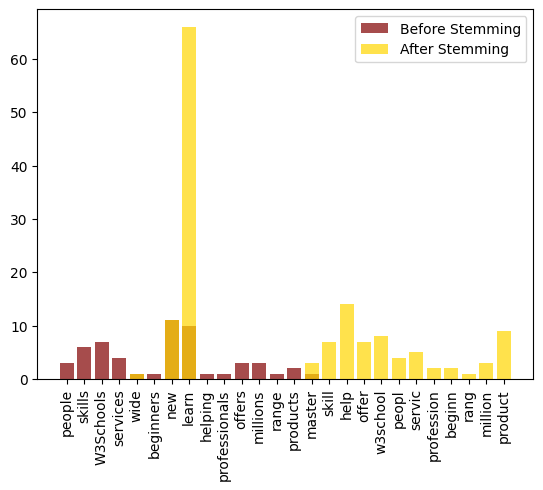

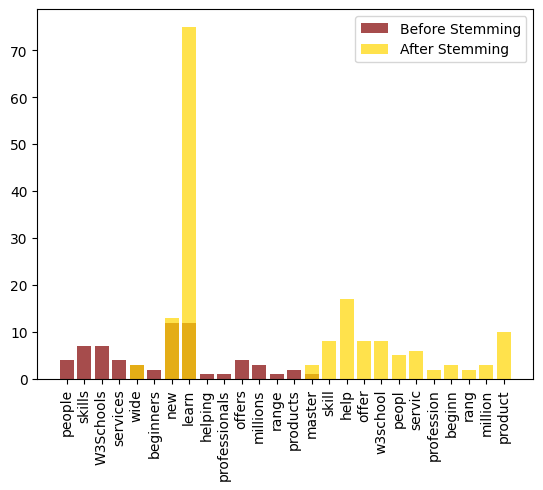

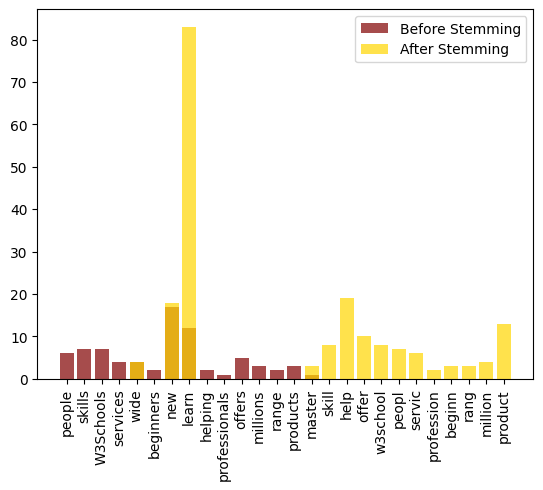

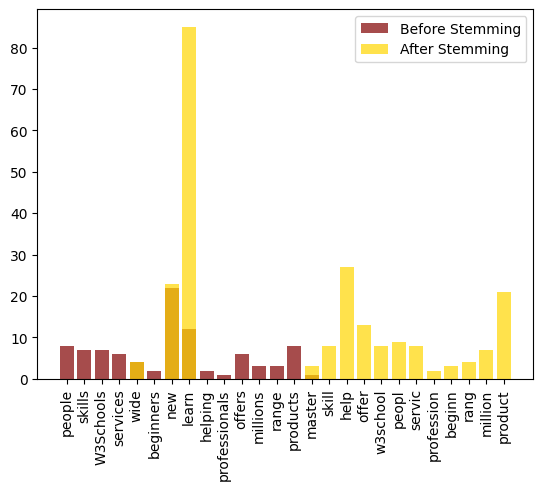

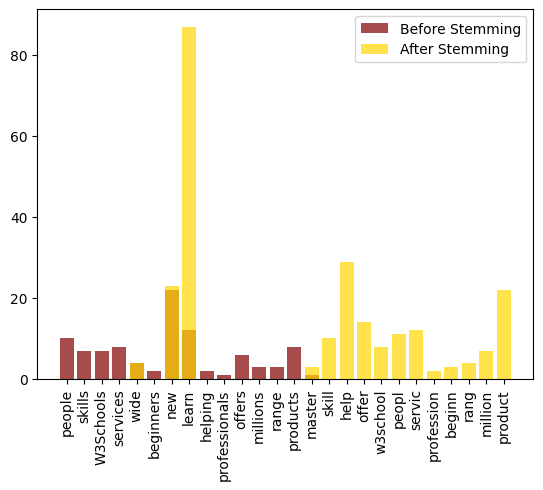

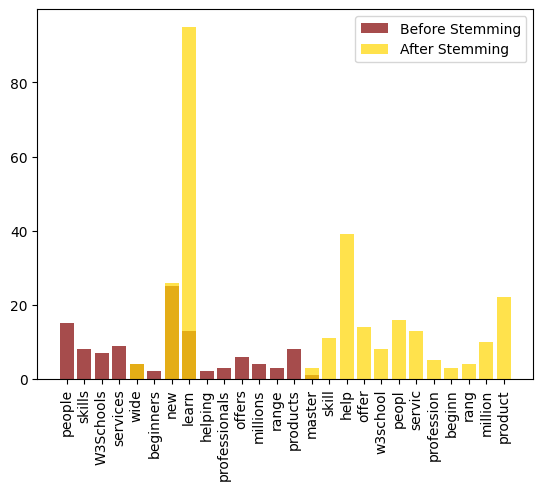

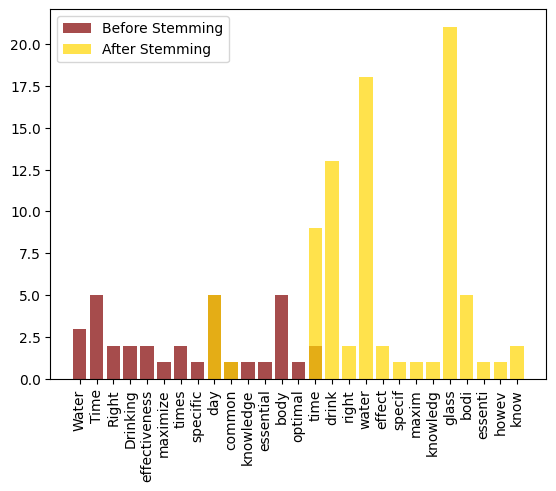

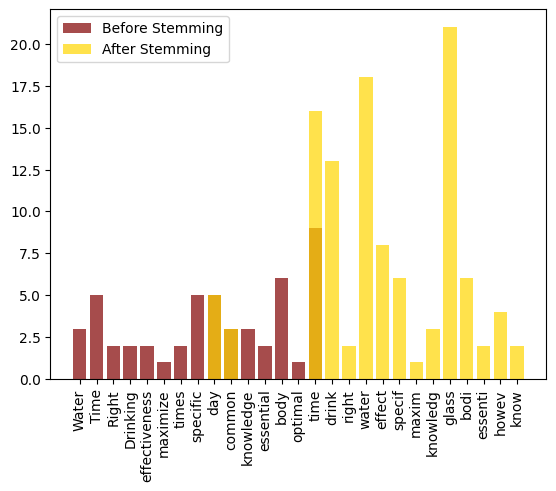

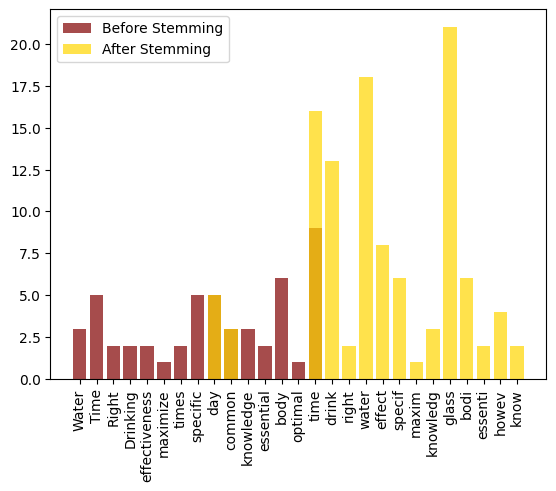

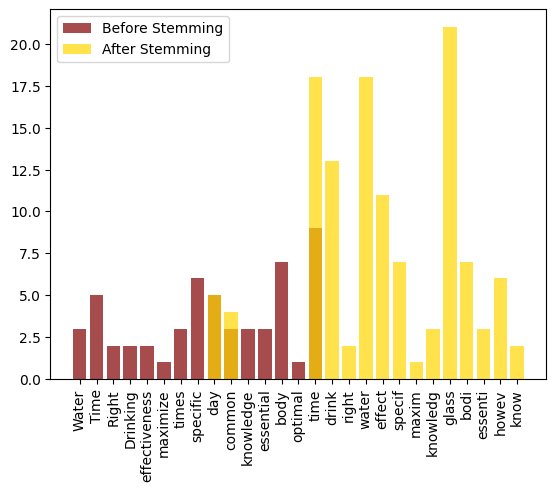

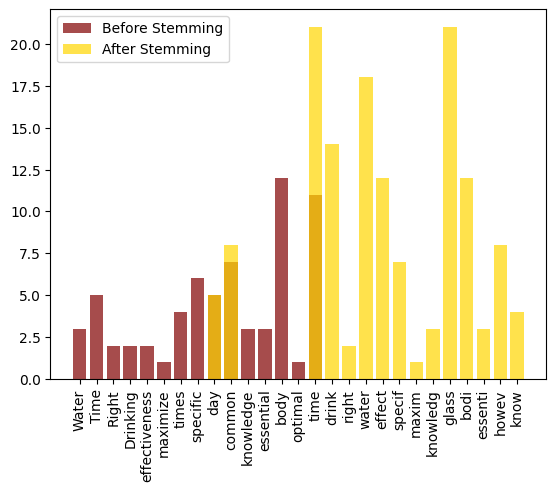

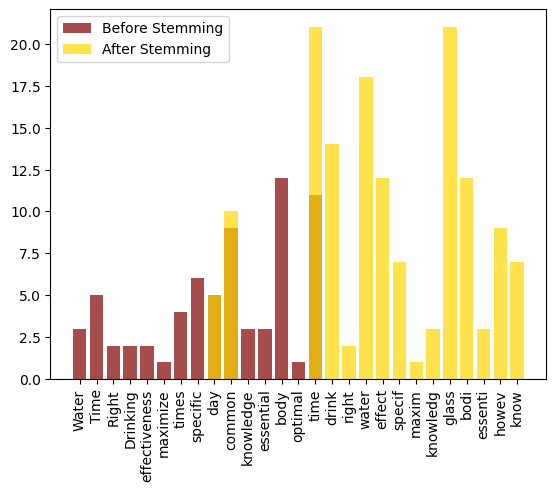

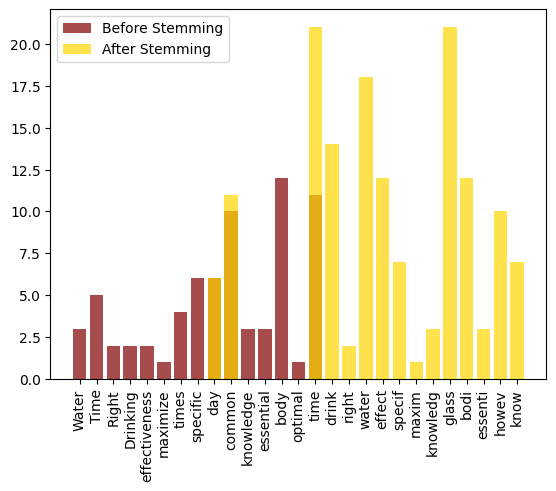

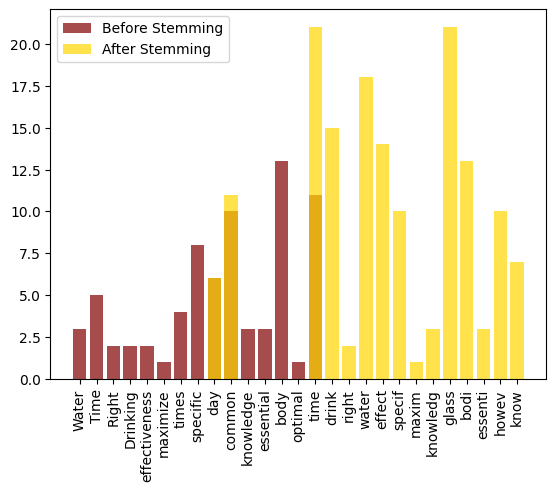

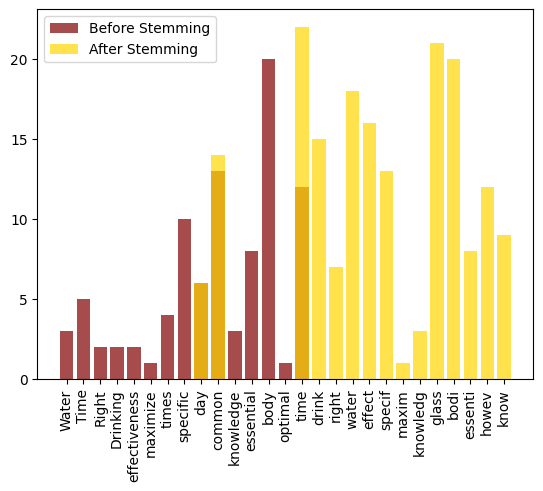

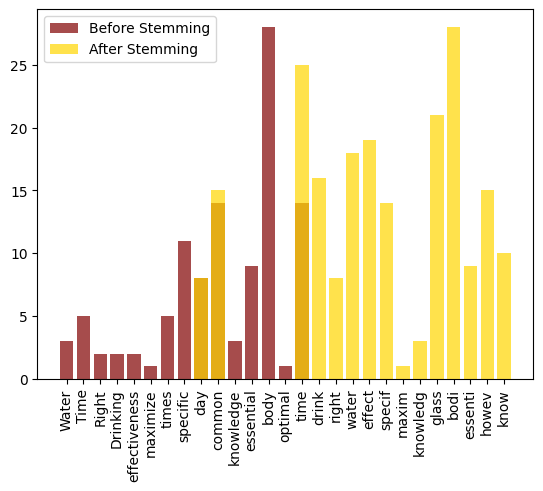

In [73]:
# stemming
def stem(text:list):
  if type(text) != list:
    text = text.split()
  stemmed = [stemmer.stem(word) for word in text]
  return stemmed

# tokenization
def tokenize(text:str, word = True):
  if not word:
    return sent_tokenize(text)
  return word_tokenize(text)

# remove non-word characters and other noisy characters
def clean(text):
  cleaned_text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
  cleaned_text = re.sub(r'\W', ' ', cleaned_text)  # Remove non-word characters
  cleaned_text = re.sub(r'\s+', ' ', cleaned_text)  # Remove extra white spaces
  return cleaned_text

# plotting
class Plotting:
  def __init__(self, x = None, y = None, label = None, marker = None, plot_type = 'hist', plot_title = None, xlabel = None, ylabel = None, single_axis = True):
    self.x = x
    self.y = y
    self.label = label
    self.marker = marker
    self.colors = ['gray', 'blue', 'pink', 'maroon', 'green']
    self.plot_type = plot_type
    self.plot_title, self.xlabel, self.ylabel = (plot_title ,xlabel ,ylabel)
    plt.figure(figsize=(10, 6))
    if self.plot_type == 'line':
      self.line_plot()
    elif self.plot_type == 'bar':
      self.bar_plot()
    elif self.plot_type == 'hist':
      self.hist_plot()


  def hist_plot(self):
    if self.x:
      if type(self.x) == list:
        for index, data in enumerate(self.x):
          plt.hist(data, bins=20, alpha=0.5, label=self.label[index])
          plt.xlabel(xlabel = self.xlabel)
          plt.ylabel(ylabel = self.ylabel)
          plt.legend()
          plt.title(self.plot_title)
      else:
        from random import randint
        color_index = randint(0, len(self.colors)-1)
        plt.hist(self.x, bins=20, alpha=0.5, label=self.label)
        plt.xlabel(xlabel = self.xlabel)
        plt.ylabel(ylabel = self.ylabel)
        plt.legend()
        plt.title(self.plot_title)

  def line_plot(self):
    if self.x and self.y:
      plt.hist(self.x,self.y, label=self.label, color=self.color)
      plt.xlabel(xlabel = self.xlabel)
      plt.ylabel(ylabel = self.ylabel)
      # plt.legend()
      plt.title(self.plot_title)

  def bar_plot(self):
    if self.x and self.y:
      plt.hist(self.x,self.y, label=self.label, color=self.color)
      plt.xlabel(xlabel = self.xlabel)
      plt.ylabel(ylabel = self.ylabel)
      # plt.legend()
      plt.title(self.plot_title)

# DOMAINS SENTENCE SEGMENTATION
domains_segments = {domain:[] for domain in domains.keys()}

# DOMAIN SENTENCES TO BE USED IN POS TAGGING
domains_sentences = {domain:[] for domain in domains.keys()}

for domain in domains.keys():
  all_dfs = []
  all_tokens_before = []
  all_tokens_after = []

  # EXTRA TEXT FROM URL
  for index, (filename, link) in enumerate(zip(domains[domain]['filenames'], domains[domain]['links'])):
    distincts = []
    # Visit the URL and read the content
    individual_df = pd.DataFrame()
    page = requests.get(link)
    contents = bs(page.content, 'html.parser')
    paragraphs = contents.find_all('p')
    found_content = []

    for i, paragraph in enumerate(paragraphs):
      text = paragraph.text.strip()
      if len(text) > 1:
        # PERFORM SENTENCE TOKENIZE
        sentences = tokenize(text, word = False)
        [domains_segments[domain].append(length) for length in [(len(tokenize(clean(sentence))), domains_sentences[domain].append(tokenize(clean(sentence))))[0] for sentence in sentences]]
        # CLEAN TEXT DATA TO REMOVE SOME OF THE IMPURITIES LIKE NON-WORDS CHARACTERS AND EXTRA SPACES
        clean_text = clean(text)

        # PERFORM WORD TOKENIZATION
        tokens = [word for word in tokenize(clean_text) if word not in stpwords]
        [all_tokens_before.append(unique) for unique in set(tokens)]

        # PERFORM STEMMING
        stemmers = stem(tokens)
        [all_tokens_after.append(unique) for unique in set(stemmers)]

        # JOIN TOKENIZED WORD TO SAVE THEM IN CSV FILE
        full_text_token = ' '.join(tokens)
        full_text_stems = ' '.join(stemmers)
        temp = [clean_text, full_text_token, full_text_stems, len(clean_text.split()),
                len(tokens), len(stemmers), len(set(tokens)), len(set(stemmers))]

        # DISTINCTS
        distincts.append([len(set(tokens)), len(set(stemmers))])
        found_content.append(temp)

    if found_content:
      # ADD SPACING AFTER EACH DATASET
      found_content.append(['**********']*6+[0, 0])
      individual_df[['Original text', 'Tokenized', 'Stemmed', 'Original size',
                     'Token size', 'Stemmed text size', 'distinct before', 'distinct after']] = found_content
      all_dfs.append(individual_df)
      length_distribution_before = Counter(all_tokens_before)
      length_distribution_after = Counter(all_tokens_after)

      plt.bar(list(length_distribution_before.keys())[0:15], list(length_distribution_before.values())[0:15],
              label='Before Stemming', color = 'maroon', alpha = 0.7)
      plt.bar(list(length_distribution_after.keys())[0:15], list(length_distribution_after.values())[0:15],
              label='After Stemming', color = 'gold', alpha = 0.7)
      plt.xticks(rotation=90)
      plt.legend()
      plt.show()

  FULL_df = pd.concat(df for df in all_dfs)
  FULL_df.to_csv(f'{domain}_data_.csv')


#sentence segmentation

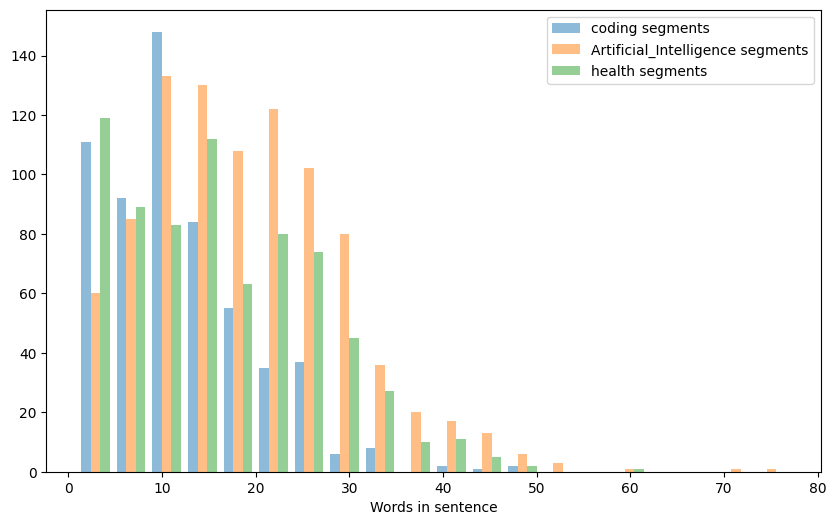

In [50]:
# colors = ['blue', 'pink', 'green']
plotter = Plotting(x = domains_segments.values(), plot_type='hist', label = [f'{domain} segments' for domain in domains.keys()], xlabel='Words in sentence')
plt.show()

#POS tagging

In [51]:
domains_pos = {domain:[] for domain in domains.keys()}
def pos_tagging(sentence):
  return pos_tag(sentence)

for domain in domains.keys():
  for i in range(3):
    index = randint(0, len(domains_sentences[domain])-1)
    sentence = domains_sentences[domain][index]
    pos = pos_tagging(sentence = sentence)
    domains_pos[domain].append(pos)


representing pos in pandas dataframe for better visualization

In [ ]:
data = [word_pos for domain in domains.keys() for sent_pos in domains_pos[domain] for word_pos in sent_pos]
pos_df = pd.DataFrame(data, columns = ['Word', 'POS'])
pos_df